In [79]:
import os
import pyspedas
from pyspedas import mms_load_fpi,tinterpol
from pytplot import tplot, get_data, store_data, tlimit, options,tplot_names
from pyspedas.mms import fpi,fgm
from pyspedas.mms.mms_orbit_plot import mms_orbit_plot
import plotly.express as px
import matplotlib.pyplot as plt


from pyspedas import time_string
import pandas as pd
import numpy as np


import pyspedas
import pytplot

In [80]:
#For each event, take the Vm component (ion velocity component directed along the magnetospheric flanks) vs. the ion number density. 


den_csv = 'MMS2_ni.csv'


den_csv = pd.read_csv(den_csv,header = 0,names = ['times','Ni','date'],
                         parse_dates=['date'])


v_arr_str = 'MMS2_Vi.csv'
v_arr = pd.read_csv('MMS2_Vi.csv',header = 0,names = ['times','Vix','Viy','Viz','date'],parse_dates=['date'])



temp_perp = 'MMS2_Tiperp.csv'

temp_para = 'MMS2_Tipara.csv'



Tipara_csv = pd.read_csv(temp_para,header = 0,names = ['times','Tipara','date'],
                         parse_dates=['date'])


Tiperp_csv = pd.read_csv(temp_perp,header = 0,names = ['times','Tiperp','date'],
                         parse_dates=['date'])




ave_Ti =[]
for i in range(len(Tipara_csv['Tipara'])):
    # temp_para = np.array(Tipara_csv['Tipara'][i])
    # temp_perp = np.array(Tiperp_csv['Tiperp'][i])
    
    ave_Ti.append(np.mean([np.array(Tipara_csv['Tipara'][i]),np.array(Tiperp_csv['Tiperp'][i])]))

ave_Ti

[538.98072,
 530.96073,
 516.03,
 494.2588,
 480.61336,
 544.04447,
 509.767025,
 479.905285,
 472.21434,
 500.5735,
 562.3687649999999,
 524.58704,
 463.88566000000003,
 522.0275449999999,
 527.8538699999999,
 551.64125,
 489.778745,
 487.46360500000003,
 505.41594000000003,
 471.16124,
 548.184145,
 512.293415,
 503.49216,
 527.329375,
 495.80748,
 465.37483499999996,
 528.70297,
 537.840305,
 531.268735,
 500.58011,
 518.86685,
 500.89206,
 484.103045,
 494.401915,
 497.10165500000005,
 493.14086999999995,
 474.54433,
 447.510895,
 505.939335,
 469.90054,
 588.33762,
 485.401675,
 513.4495099999999,
 494.82255,
 509.95241,
 477.11635,
 501.32665999999995,
 512.391385,
 477.84538499999996,
 535.733225,
 478.883485,
 517.43313,
 523.6639,
 510.96029999999996,
 491.531435,
 512.82271,
 519.95709,
 500.315395,
 508.77356,
 504.66938500000003,
 588.5556,
 512.94582,
 486.68216,
 469.67746999999997,
 455.47487,
 524.427065,
 485.39340000000004,
 472.66976,
 423.97605999999996,
 455.489195

In [81]:
Tiperp_csv

,times,Tiperp,date
0,1.592426e+09,565.31990,2020-06-17 20:29:23.206896128
1,1.592426e+09,540.48456,2020-06-17 20:29:23.356896000
2,1.592426e+09,524.48280,2020-06-17 20:29:23.506895872
3,1.592426e+09,518.70730,2020-06-17 20:29:23.656896000
4,1.592426e+09,477.01355,2020-06-17 20:29:23.806896128
...,...,...,...
120259,1.592444e+09,299.16770,2020-06-18 01:30:02.312813056
120260,1.592444e+09,308.18835,2020-06-18 01:30:02.462812928
120261,1.592444e+09,294.30820,2020-06-18 01:30:02.612813056
120262,1.592444e+09,303.12800,2020-06-18 01:30:02.762812928


In [82]:
# #For each event, take the Vm component (ion velocity component directed along the magnetospheric flanks) vs. the ion number density. 

# den_csv1 = 'MMS1_ni.csv'
# den_csv2 = 'MMS2_ni.csv'
# den_csv3 = 'MMS3_ni.csv'
# den_csv4 = 'MMS4_ni.csv'


# den_csv = pd.read_csv(den_csv,header = 0,names = ['times','Ni','date'],
#                          parse_dates=['date'])


# v_arr_str = 'MMS2_Vi.csv'
# v_arr = pd.read_csv('MMS2_Vi.csv',header = 0,names = ['times','Vix','Viy','Viz','date'],parse_dates=['date'])



# temp_perp = 'MMS2_Tiperp.csv'

# temp_para = 'MMS2_Tipara.csv'



# Tipara_csv = pd.read_csv(temp_para,header = 0,names = ['times','Tipara','date'],
#                          parse_dates=['date'])

In [83]:
# jet_candidate_timeranges = np.array([['2020-06-17/21:16:25','2020-06-17/21:16:43'], #2 # got it pretty good I think
# ['2020-06-17/21:16:50','2020-06-17/21:17:10'], #3 # got it pretty good I think
# ['2020-06-17/21:24:34','2020-06-17/21:25:22.00'], #4 # good looking event
# ['2020-06-17/21:29:08.000','2020-06-17/21:29:20'], #5# good looking event
# ['2020-06-17/21:40:49','2020-06-17/21:41:23'], #6 okay looking
# ['2020-06-18/00:09:39.000','2020-06-18/00:10:07.000']  ,#8            
# ['2020-06-17/22:43:33.00','2020-06-17/22:44:05.00'], #9 ehh
# ['2020-06-17/22:46:24.000','2020-06-17/22:46:41.000'],#10 okay looking
# ['2020-06-17/23:03:49.000','2020-06-17/23:03:59.000'], #11 pretty good
# ['2020-06-17/23:08:35.500','2020-06-17/23:08:59.000'],#12
# ['2020-06-17/23:10:42.000','2020-06-17/23:10:53.000'], #13 okay, hard to see peak Vl
# ['2020-06-17/23:17:16','2020-06-17/23:17:29.000'], #14  pretty good
# ['2020-06-17/23:34:54','2020-06-17/23:35:18'],# 15 good
# ['2020-06-17/23:36:56.000','2020-06-17/23:37:27.000'], #16 good; well-defined peak
# ['2020-06-17/23:42:45.000','2020-06-17/23:43:02.000'],#17 VERY GOOD
# ['2020-06-17/23:49:23.000','2020-06-17/23:49:49.000'], #18 good; well-defined peak
# ['2020-06-17/23:57:55','2020-06-17/23:58:27'], #19 good
# ['2020-06-18/00:09:39.000','2020-06-18/00:10:07.000'],#21
# ['2020-06-18/00:22:08.000','2020-06-18/00:22:36']]) #22



In [84]:
# v_arr = [['MMS2_V_LMN_2020-06-17_21_16_25_2020-06-17_21_16_43.csv'],
# ['MMS2_V_LMN_2020-06-17_21_16_50_2020-06-17_21_17_10.csv'],
# ['MMS2_V_LMN_2020-06-17_21_24_34_2020-06-17_21_25_22.csv'],
# ['MMS2_V_LMN_2020-06-17_21_29_08_2020-06-17_21_29_20.csv'],
# ['MMS2_V_LMN_2020-06-17_21_40_49_2020-06-17_21_41_23.csv'],
# ['MMS2_V_LMN_2020-06-17_22_43_33_2020-06-17_22_44_05.csv'],
# ['MMS2_V_LMN_2020-06-17_22_46_24_2020-06-17_22_46_41.csv'],
# ['MMS2_V_LMN_2020-06-17_23_03_49_2020-06-17_23_03_59.csv'],
# ['MMS2_V_LMN_2020-06-17_23_08_35_2020-06-17_23_08_59.csv'],
# ['MMS2_V_LMN_2020-06-17_23_10_42_2020-06-17_23_10_53.csv'],
# ['MMS2_V_LMN_2020-06-17_23_17_16_2020-06-17_23_17_29.csv'],
# ['MMS2_V_LMN_2020-06-17_23_34_54_2020-06-17_23_35_18.csv'],
# ['MMS2_V_LMN_2020-06-17_23_36_56_2020-06-17_23_37_27.csv'],
# ['MMS2_V_LMN_2020-06-17_23_42_45_2020-06-17_23_43_02.csv'],
# ['MMS2_V_LMN_2020-06-17_23_49_23_2020-06-17_23_49_49.csv'],
# ['MMS2_V_LMN_2020-06-17_23_57_55_2020-06-17_23_58_27.csv'],
# ['MMS2_V_LMN_2020-06-18_00_22_08_2020-06-18_00_22_36.csv']]




# v_arr = ["MMS2_V_LMN_2020-06-17_21_16_50_2020-06-17_21_17_10.csv", # 3
# "MMS2_V_LMN_2020-06-17_21_24_34_2020-06-17_21_25_22.csv", #4
# "MMS2_V_LMN_2020-06-17_21_40_49_2020-06-17_21_41_23.csv",#6
# "MMS2_V_LMN_2020-06-17_22_18_16_2020-06-17_22_18_33.csv",#8
# "MMS2_V_LMN_2020-06-17_22_43_33_2020-06-17_22_44_05.csv", #9
# "MMS2_V_LMN_2020-06-17_22_46_24_2020-06-17_22_46_41.csv",#10
# "MMS2_V_LMN_2020-06-17_23_03_49_2020-06-17_23_03_59.csv",#11
# "MMS2_V_LMN_2020-06-17_23_10_42_2020-06-17_23_10_53.csv",#13
# "MMS2_V_LMN_2020-06-17_23_17_16_2020-06-17_23_17_29.csv",#14
# "MMS2_V_LMN_2020-06-17_23_34_54_2020-06-17_23_35_18.csv",#15
# "MMS2_V_LMN_2020-06-17_23_36_56_2020-06-17_23_37_27.csv",#16
# "MMS2_V_LMN_2020-06-17_23_42_45_2020-06-17_23_43_02.csv",#17
# "MMS2_V_LMN_2020-06-17_23_49_23_2020-06-17_23_49_49.csv",#18
# "MMS2_V_LMN_2020-06-17_23_57_55_2020-06-17_23_58_27.csv",#19
# "MMS2_V_LMN_2020-06-18_00_09_39_2020-06-18_00_10_07.csv",#21
# "MMS2_V_LMN_2020-06-18_00_22_08_2020-06-18_00_22_36.csv"]#22


# event_names = ["Event 2","Event 3","Event 4","Event 5","Event 6","Event 9",
#                "Event 10","Event 11","Event 12","Event 13","Event 14",
#                "Event 15","Event 16","Event 17","Event 18","Event 19","Event 22"]
# fig, axs = plt.subplots(3, 6, figsize=(20, 10))
# fig.suptitle('KH Vorticity Analysis')
# num=0
# for j in range(3):
#     for k in range(6):
#             v_arr1 = pd.read_csv(v_arr[num],header = 0,names = ['times','VL','VM','VZ','date'],parse_dates=['date'])
#             t1 = den_csv.date.searchsorted(pd.to_datetime(v_arr1['date'][0]))
#             t2 = den_csv.date.searchsorted(pd.to_datetime(v_arr1['date'][len(v_arr1['date'])-1]))
#             axs[j,k].scatter(den_csv['Ni'][t1:t2],v_arr1['VM'][0:len(v_arr1['VM'])-1],c='purple')
#             axs[j,k].set_title(event_names[num])
#             axs[j,k].grid()
#             axs[0,0].set_ylabel("$V_M$ [$km/s$]")
#             axs[1,0].set_ylabel("$V_M$ [$km/s$]")
#             axs[2,0].set_ylabel("$V_M$ [$km/s$]")
            
            
#             axs[2,0].set_xlabel("$n_i$ [$cm^{-3}$]")
#             axs[2,1].set_xlabel("$n_i$  [$cm^{-3}$]")
#             axs[2,2].set_xlabel("$n_i$  [$cm^{-3}$]")
#             axs[2,3].set_xlabel("$n_i$  [$cm^{-3}$]")
#             axs[2,4].set_xlabel("$n_i$  [$cm^{-3}$]")
#             axs[2,5].set_xlabel("$n_i$  [$cm^{-3}$]")
#             num=num+1
        


# #plt.tight_layout()



# plt.show()


In [85]:
# #original 02/19/20:53
# t1 = v_arr.date.searchsorted(pd.to_datetime('2020-06-17/21:00:00'))
# t2 = v_arr.date.searchsorted(pd.to_datetime('2020-06-18/01:30:00'))



# Tipara = np.array(Tipara_csv['Tipara'][t1:t2])


# lt_250 = np.argwhere(Tipara <= 250)

# bt250_900 = np.where((Tipara > 250) & (Tipara < 900))

# gt_900 = np.argwhere(Tipara >=900)

In [86]:
t1 = v_arr.date.searchsorted(pd.to_datetime('2020-06-17/21:00:00'))
t2 = v_arr.date.searchsorted(pd.to_datetime('2020-06-18/03:30:00'))



T= np.array(ave_Ti[t1:t2])

print(T)

msh_pop = np.argwhere(T <= 200)

#msp_pop = np.argwhere((T > 270) & (T< 462))
msp_pop = np.argwhere(T > 250)


[538.98072   530.96073   516.03      ...  98.4427325 117.834587
 133.26053  ]


In [87]:
msp_pop

array([[     0],
       [     1],
       [     2],
       ...,
       [107018],
       [107035],
       [107036]])

# Plot all ion temperatures on one plot

In [88]:
# # #original 02/19/20:53
# density = np.array(den_csv['Ni'][t1:t2])

# Vx = np.array(v_arr['Vix'][t1:t2])

# fig, axs = plt.subplots(1, 1, figsize=(11, 11))
# #fig.suptitle('KH Vorticity Analysis')

# plt.rcParams.update({'font.size': 22})
# axs.scatter(density[lt_250],Vx[lt_250],label='$T_i < 250$ eV', color='purple',marker='o',facecolor='none')
# axs.scatter(density[bt250_900],Vx[bt250_900],label='$250 < T_i < 900$ eV',color='darkturquoise',marker='o',facecolor='none')
# axs.scatter(density[gt_900],Vx[gt_900],label='$T_i > 900$ eV',color='black',marker='o',facecolor='none')
# axs.set_ylabel('$V_{ix}$ [km/s]')
# axs.set_xlabel('$n_{i}$ [$cm^{-3}$]')
# axs.legend()
# axs.grid()

# # for j in range(3):
# #     for k in range(6):
# #             v_arr1 = pd.read_csv(v_arr[num],header = 0,names = ['times','VL','VM','VZ','date'],parse_dates=['date'])
# #             t1 = den_csv.date.searchsorted(pd.to_datetime(v_arr1['date'][0]))
# #             t2 = den_csv.date.searchsorted(pd.to_datetime(v_arr1['date'][len(v_arr1['date'])-1]))
# #             axs[j,k].scatter(den_csv['Ni'][t1:t2],v_arr1['VM'][0:len(v_arr1['VM'])-1],c='purple')
# #             axs[j,k].set_title(event_names[num])

# # plt.show()

# plt.savefig('KH_vorticity_analysis.png', format='png', dpi=150)

In [89]:
# density = np.array(den_csv['Ni'][t1:t2])

# Vx = np.array(v_arr['Vix'][t1:t2])

# fig, axs = plt.subplots(1, 1, figsize=(11, 11))
# #fig.suptitle('KH Vorticity Analysis')

# plt.rcParams.update({'font.size': 22})
# axs.scatter(density[msp_pop],Vx[msp_pop],label='$T_i >300$ eV', color='darkturquoise',marker='o',facecolor='none')
# axs.scatter(density[msh_pop],Vx[msh_pop],label='$T_i < 300$ eV', color='purple',marker='o',facecolor='none')

# axs.set_ylabel('$V_{ix}$ [km/s]')
# axs.set_xlabel('$n_{i}$ [$cm^{-3}$]')
# axs.legend()
# axs.grid()

# # for j in range(3):
# #     for k in range(6):
# #             v_arr1 = pd.read_csv(v_arr[num],header = 0,names = ['times','VL','VM','VZ','date'],parse_dates=['date'])
# #             t1 = den_csv.date.searchsorted(pd.to_datetime(v_arr1['date'][0]))
# #             t2 = den_csv.date.searchsorted(pd.to_datetime(v_arr1['date'][len(v_arr1['date'])-1]))
# #             axs[j,k].scatter(den_csv['Ni'][t1:t2],v_arr1['VM'][0:len(v_arr1['VM'])-1],c='purple')
# #             axs[j,k].set_title(event_names[num])

# # plt.show()

# #plt.savefig('KH_vorticity_analysis.png', format='png', dpi=150)

In [90]:
# fig, axs = plt.subplots(1, 1, figsize=(11, 11))

# plt.rcParams.update({'font.size': 22})
# axs.scatter(density[msh_pop],Vx[msh_pop],label='$T_i < 300$ eV', color='purple',marker='o',facecolor='none')
# #axs.scatter(density[msp_pop],Vx[msp_pop],label='$T_i >300$ eV', color='darkturquoise',marker='o',facecolor='none')
# axs.set_ylabel('$V_{ix}$ [km/s]')
# axs.set_xlabel('$n_{i}$ [$cm^{-3}$]')
# axs.legend()
# axs.grid()
# plt.show()


In [91]:
# fig, axs = plt.subplots(1, 1, figsize=(11, 11))

# plt.rcParams.update({'font.size': 22})
# #axs.scatter(density[msh_pop],Vx[msh_pop],label='$T_i < 300$ eV', color='purple',marker='o',facecolor='none')
# axs.scatter(density[msp_pop],Vx[msp_pop],label='$T_i >300$ eV', color='darkturquoise',marker='o',facecolor='none')
# axs.set_ylabel('$V_{ix}$ [km/s]')
# axs.set_xlabel('$n_{i}$ [$cm^{-3}$]')
# axs.legend()
# axs.grid()


# plot ion temperature in different panels

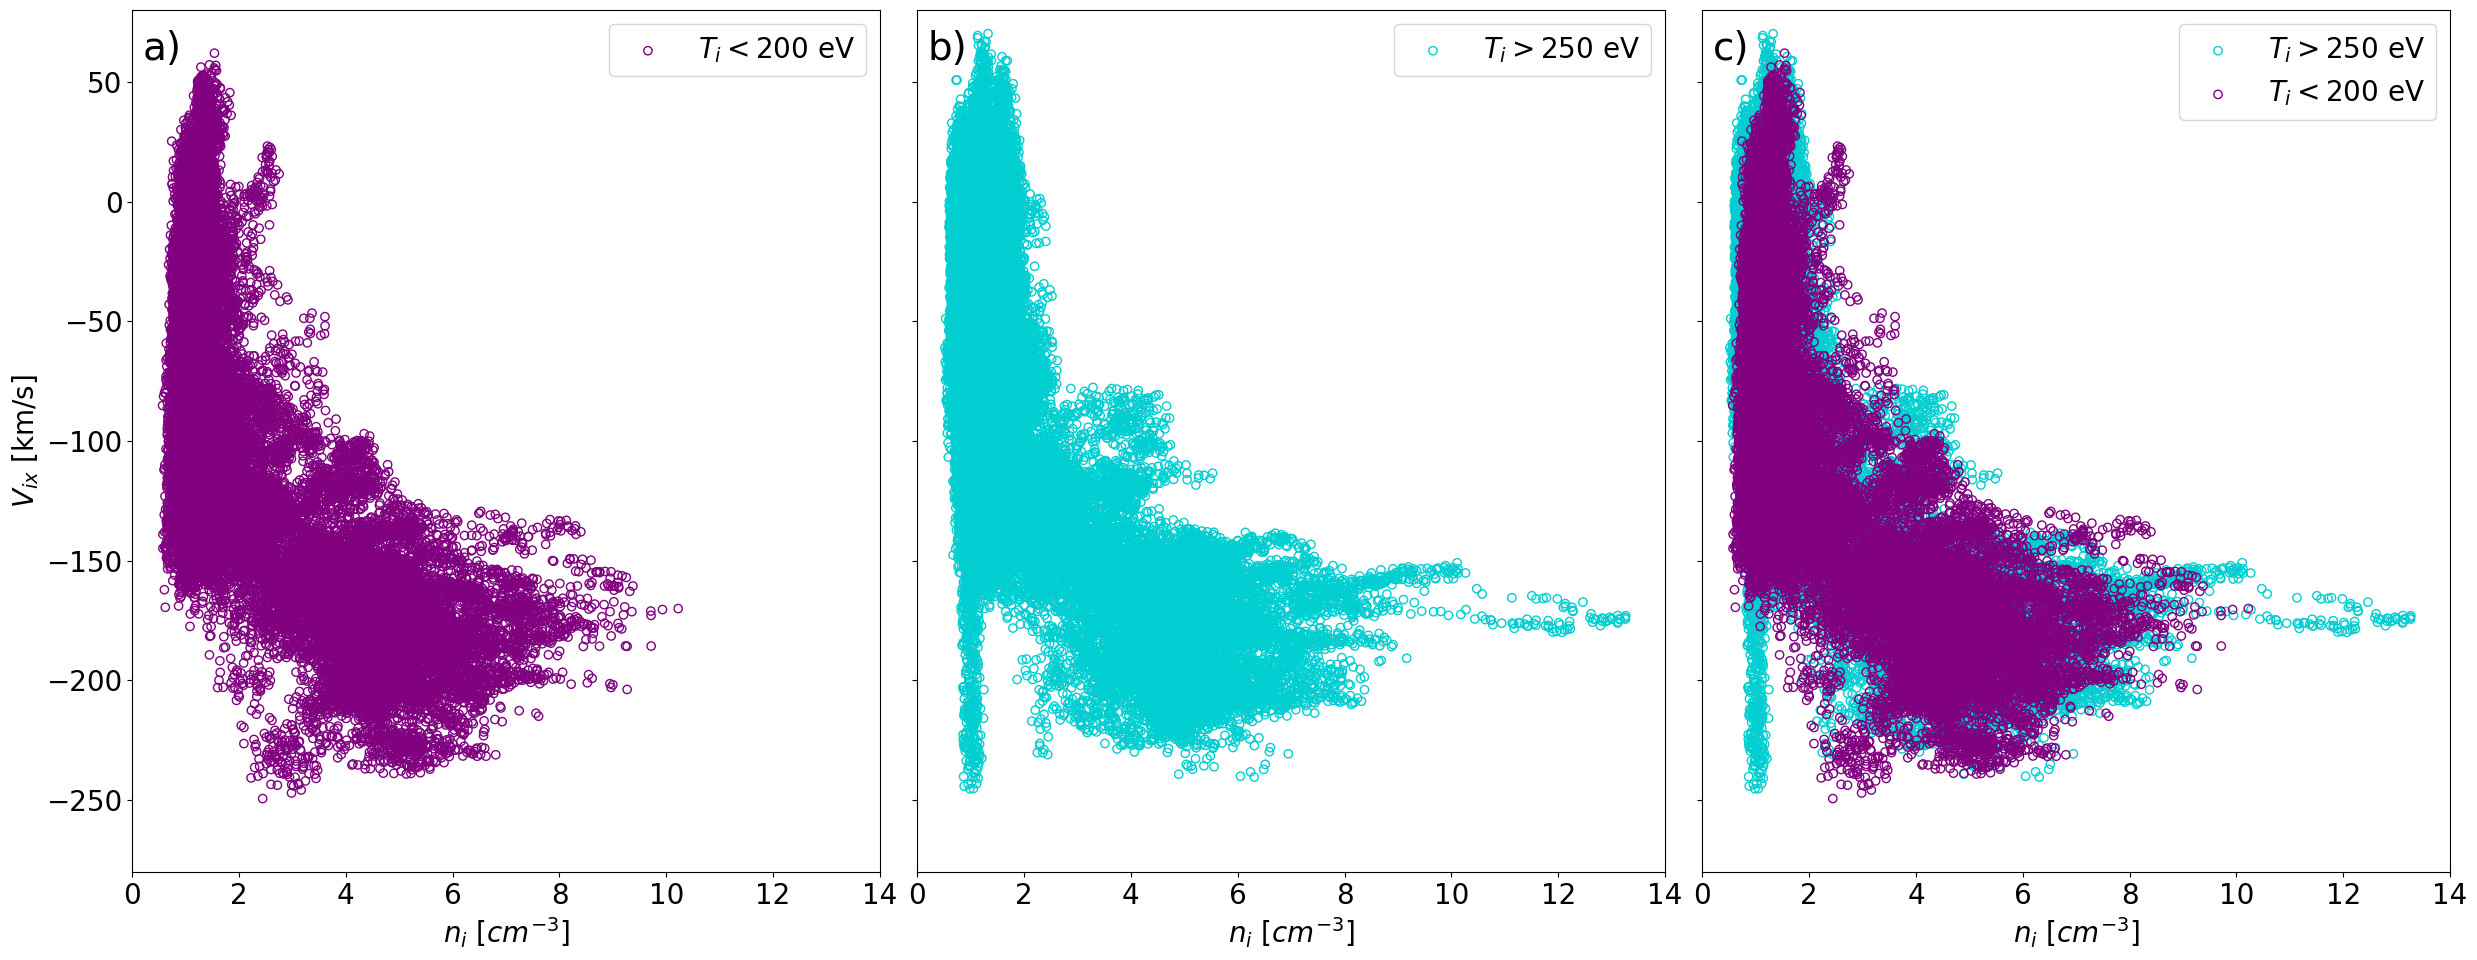

In [92]:
plt.rcParams.update({'font.size': 12})
density = np.array(den_csv['Ni'][t1:t2])

Vx = np.array(v_arr['Vix'][t1:t2])
plt.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(1, 3, figsize=(25, 10))
#fig.suptitle('KH Vorticity Analysis')


axs[0].scatter(density[msh_pop],Vx[msh_pop],label='$T_i < 200$ eV', color='purple',marker='o',facecolor='none')
axs[0].set_ylim([-280,80])
axs[0].set_xlim([0,14])
axs[0].legend()
axs[0].text(0.2, 59, 'a)', fontsize = 28)
#axs[0,0].grid()
axs[0].set_ylabel('$V_{ix}$ [km/s]')
#axs[0].set_xticks(range((14)), labels=["","","2","","4","","6","","8","","10","","12",""])
axs[0].set_xlabel('$n_{i}$ [$cm^{-3}$]')

axs[1].scatter(density[msp_pop],Vx[msp_pop],label='$T_i >250$ eV', color='darkturquoise',marker='o',facecolor='none')
axs[1].legend()
#axs[0,1].grid()
axs[1].set_ylim([-280,80])
axs[1].set_xlim([0,14])
axs[1].tick_params( axis='y',labelleft=False)
axs[1].set_xlabel('$n_{i}$ [$cm^{-3}$]')
#axs[1].set_xticks(range((14)), labels=["","","2","","4","","6","","8","","10","","12",""])
axs[1].text(0.2, 59, 'b)', fontsize = 28)


axs[2].scatter(density[msp_pop],Vx[msp_pop],label='$T_i > 250$ eV', color='darkturquoise',marker='o',facecolor='none')
axs[2].scatter(density[msh_pop],Vx[msh_pop],label='$T_i < 200$ eV', color='purple',marker='o',facecolor='none')

axs[2].legend()
#axs[1,0].grid()
axs[2].set_ylim([-280,80])
axs[2].set_xlim([0,14])
axs[2].set_xlabel('$n_{i}$ [$cm^{-3}$]')
axs[2].tick_params(axis='y',labelleft=False)

#axs[2].set_xticks(range((14)), labels=["0","","2","","4","","6","","8","","10","","12",""])
axs[2].text(0.2, 59, 'c)', fontsize = 28)



# axs[1,1].scatter(density[lt_250],Vx[lt_250],label='$T_i < 250$ eV', color='purple',marker='o',facecolor='none')
# axs[1,1].scatter(density[bt250_900],Vx[bt250_900],label='$250 < T_i < 900$ eV',color='darkturquoise',marker='o',facecolor='none')
# axs[1,1].scatter(density[gt_900],Vx[gt_900],label='$T_i > 900$ eV',color='black',marker='o',facecolor='none')
# axs[1,1].legend()
# #axs[1,1].grid()
# axs[1,1].set_ylim([-280,80])
# axs[1,1].set_xlim([0,14])
# axs[1,1].tick_params(axis='y',labelleft=False)
# axs[1,1].set_xlabel('$n_{i}$ [$cm^{-3}$]')
# axs[1,1].set_xticks(range((15)), labels=["","","2","","4","","6","","8","","10","","12","","14"])
# axs[1,1].text(0.2, 59, 'd)', fontsize = 22)

plt.tight_layout()
plt.subplots_adjust(hspace=0.02)
plt.subplots_adjust(wspace=0.05)
# axs.set_ylabel('$V_{ix}$ [km/s]')
# axs.set_xlabel('$n_{i}$ [$cm^{-3}$]')

# for j in range(3):
#     for k in range(6):
#             v_arr1 = pd.read_csv(v_arr[num],header = 0,names = ['times','VL','VM','VZ','date'],parse_dates=['date'])
#             t1 = den_csv.date.searchsorted(pd.to_datetime(v_arr1['date'][0]))
#             t2 = den_csv.date.searchsorted(pd.to_datetime(v_arr1['date'][len(v_arr1['date'])-1]))
#             axs[j,k].scatter(den_csv['Ni'][t1:t2],v_arr1['VM'][0:len(v_arr1['VM'])-1],c='purple')
#             axs[j,k].set_title(event_names[num])

#plt.show()

plt.savefig('KH_vorticity_analysis.png', format='png', dpi=150)

In [93]:
ion_vars = pyspedas.mms.mms_load_fpi(trange=['2020-06-17/20:30:00','2020-06-18/00:30:00'],probe='2',data_rate='brst',datatype='dis-moms',  center_measurement=True,time_clip=True)


24-Feb-25 11:39:30: Loading pydata/mms2/fpi/brst/l2/dis-moms/2020/06/17/mms2_fpi_brst_l2_dis-moms_20200617202923_v3.4.0.cdf
24-Feb-25 11:39:30: Loading pydata/mms2/fpi/brst/l2/dis-moms/2020/06/17/mms2_fpi_brst_l2_dis-moms_20200617203153_v3.4.0.cdf
24-Feb-25 11:39:30: Loading pydata/mms2/fpi/brst/l2/dis-moms/2020/06/17/mms2_fpi_brst_l2_dis-moms_20200617203423_v3.4.0.cdf
24-Feb-25 11:39:30: Loading pydata/mms2/fpi/brst/l2/dis-moms/2020/06/17/mms2_fpi_brst_l2_dis-moms_20200617203653_v3.4.0.cdf
24-Feb-25 11:39:30: Loading pydata/mms2/fpi/brst/l2/dis-moms/2020/06/17/mms2_fpi_brst_l2_dis-moms_20200617203923_v3.4.0.cdf
24-Feb-25 11:39:30: Loading pydata/mms2/fpi/brst/l2/dis-moms/2020/06/17/mms2_fpi_brst_l2_dis-moms_20200617204153_v3.4.0.cdf
24-Feb-25 11:39:30: Loading pydata/mms2/fpi/brst/l2/dis-moms/2020/06/17/mms2_fpi_brst_l2_dis-moms_20200617204413_v3.4.0.cdf
24-Feb-25 11:39:30: Loading pydata/mms2/fpi/brst/l2/dis-moms/2020/06/17/mms2_fpi_brst_l2_dis-moms_20200617204643_v3.4.0.cdf
24-Feb-2

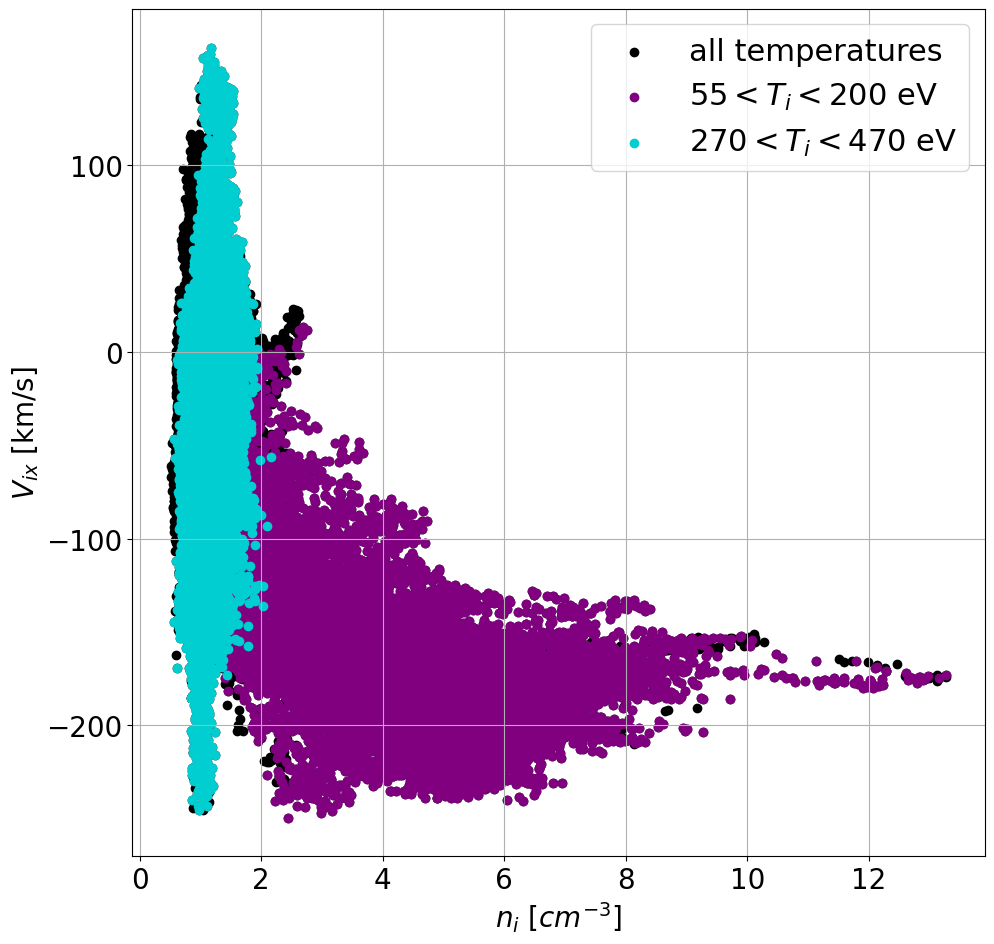

In [94]:


ni_mms2 = 'mms2_dis_numberdensity_brst'
Ti_para_mms2 = 'mms2_dis_temppara_brst'
Ti_perp_mms2 = 'mms2_dis_tempperp_brst'
Vi_mms2 = 'mms2_dis_bulkv_gse_brst'

times_ni_mms2, data_ni_mms2 = get_data(ni_mms2)

times_Ti_para_mms2, data_Tipara_mms2 = get_data(Ti_para_mms2)
times_Ti_perp_mms2, data_Tiperp_mms2 = get_data(Ti_perp_mms2)
ave_ti = (data_Tipara_mms2+data_Tiperp_mms2)/2

times_Vi_mms2, data_Vi_mms2 = get_data(Vi_mms2)
Vx = data_Vi_mms2[:,0]
# Try with my found average MSH and MSP temps
# high-end MSH temperature values 191.45989192691292
# low-end MSH temperature values 55.94289497748635

# high-end MSP temperature values 462.04607447138704
# low-end MSP temperature values 272.71132427796596




MSH_ions = np.where((ave_ti > 55) & (ave_ti < 200))

MSP_ions = np.where((ave_ti > 270) & (ave_ti < 470))

fig, axs = plt.subplots(1, 1, figsize=(11, 11))
#fig.suptitle('KH Vorticity Analysis')

plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.size': 22})
axs.scatter(data_ni_mms2,Vx ,label='all temperatures',color='black')
axs.scatter(data_ni_mms2[MSH_ions],Vx[MSH_ions],label='$55 < T_i < 200$ eV',color='purple')
axs.scatter(data_ni_mms2[MSP_ions],Vx[MSP_ions],label='$270 < T_i < 470$ eV',color='darkturquoise')

axs.set_ylabel('$V_{ix}$ [km/s]')
axs.set_xlabel('$n_{i}$ [$cm^{-3}$]')
axs.legend()
axs.grid()

axs.set_ylabel('$V_{ix}$ [km/s]')
axs.set_xlabel('$n_{i}$ [$cm^{-3}$]')
#axs.legend()


# for j in range(3):
#     for k in range(6):
#             v_arr1 = pd.read_csv(v_arr[num],header = 0,names = ['times','VL','VM','VZ','date'],parse_dates=['date'])
#             t1 = den_csv.date.searchsorted(pd.to_datetime(v_arr1['date'][0]))
#             t2 = den_csv.date.searchsorted(pd.to_datetime(v_arr1['date'][len(v_arr1['date'])-1]))
#             axs[j,k].scatter(den_csv['Ni'][t1:t2],v_arr1['VM'][0:len(v_arr1['VM'])-1],c='purple')
#             axs[j,k].set_title(event_names[num])

# plt.show()

plt.savefig('KH_vorticity_analysis.png', format='png', dpi=150)

In [95]:
density

array([1.5602217, 1.5632198, 1.6154292, ..., 1.2824576, 1.3697261,
       1.2691565])